### Gera shapefiles COPPE

In [ ]:
! pip install pandas
! pip install geopandas
! pip install sqlalchemy
! pip install psycopg2
! pip install GeoAlchemy2
! pip install openpyxl
! pip install matplotlib

In [3]:
! pip freeze > requirements.txt

In [1]:
import pandas as pd
import geopandas as gpd
from sqlalchemy import create_engine
import glob
import matplotlib as plt
from matplotlib import pyplot
import os
import shutil

In [2]:
dataPath = f'D:\Atrium\Projects\AdaptaBrasil\Data\COPPE\\'
outputPath = f'D:\Atrium\Projects\AdaptaBrasil\Data\COPPE\\output\\'
shpName = 'AdaptaBrasil4.shp'
xlsName = 'valores_economicos.xlsx'

In [3]:
gdf = gpd.read_file(dataPath+shpName)

In [4]:
df = pd.read_excel(dataPath+xlsName)

In [5]:
print(gdf.columns)
print(df.columns)
#print(gdf.head(1))
#print(df.head(1))

Index(['ID', 'NOME', 'GEOCOD_IB', 'CLASSE', 'UF', 'geometry'], dtype='object')
Index(['id', 'nome', '1000-2030-I', '1000-2050-I', '1000-2030-M',
       '1000-2050-M', '1000-2030-D', '1000-2050-D', '1001-2019', '1001-2030-I',
       '1001-2050-I', '1001-2030-M', '1001-2050-M', '1001-2030-D',
       '1001-2050-D', '1002-2020', '1002-2030-I', '1002-2050-I', '1002-2030-M',
       '1002-2050-M', '1002-2030-D', '1002-2050-D', '1003-2020', '1003-2030-I',
       '1003-2050-I', '1003-2030-M', '1003-2050-M', '1003-2030-D',
       '1003-2050-D', '1004-2020', '1004-2030-I', '1004-2050-I', '1004-2030-M',
       '1004-2050-M', '1004-2030-D', '1004-2050-D', '1005-2019', '1005-2030-I',
       '1005-2050-I', '1005-2030-M', '1005-2050-M', '1005-2030-D',
       '1005-2050-D', '1006-2020', '1006-2030-I', '1006-2050-I', '1006-2030-M',
       '1006-2050-M', '1006-2030-D', '1006-2050-D', '1007-2030-I',
       '1007-2050-I', '1008-2030-I', '1008-2050-I', '1009-2030-I',
       '1009-2050-I', '1010-2030-I', '10

In [6]:
gdf = gdf.drop('NOME', axis=1)
print(gdf.columns)

Index(['ID', 'GEOCOD_IB', 'CLASSE', 'UF', 'geometry'], dtype='object')


In [7]:
gdf.columns = ['ID', 'GEOCOD_IB', 'CLASSE', 'nome', 'geometry']
print(gdf.columns)

Index(['ID', 'GEOCOD_IB', 'CLASSE', 'nome', 'geometry'], dtype='object')


In [8]:
merged = gpd.GeoDataFrame(df.merge(gdf, on="nome"))

In [9]:
merged

,id,nome,1000-2030-I,1000-2050-I,1000-2030-M,1000-2050-M,1000-2030-D,1000-2050-D,1001-2019,1001-2030-I,...,1011-2030-I,1011-2050-I,1012-2030-I,1012-2050-I,1013-2030-I,1013-2050-I,ID,GEOCOD_IB,CLASSE,geometry
0,11,RO,NaN,0.012192,NaN,-0.016386,NaN,-0.028578,47091,0.2546,...,-0.022215,-0.065176,0.000087,0.000262,0.055135,0.165406,26,26,Medio,"POLYGON ((-62.87000 -7.98000, -62.86000 -7.980..."
1,12,AC,NaN,0.001141,NaN,-0.021861,NaN,-0.023002,15630,0.1964,...,-0.001407,-0.004215,0.000524,0.001573,0.048461,0.145384,1,1,Baixo,"POLYGON ((-73.18000 -7.34000, -72.58000 -7.550..."
2,13,AM,NaN,-0.007878,NaN,-0.020490,NaN,-0.012612,108181,0.3056,...,-0.000551,-0.001652,-0.003608,-0.010784,0.027424,0.082272,27,27,Medio,"POLYGON ((-67.33000 2.03000, -67.32000 2.00000..."
3,14,RR,NaN,-0.001788,NaN,-0.016821,NaN,-0.015033,14292,0.1818,...,0.000000,0.000000,-0.000275,-0.000826,0.041330,0.123989,20,20,Medio,"POLYGON ((-60.20000 5.26000, -60.20000 5.26000..."
4,15,PA,NaN,0.008829,NaN,-0.016136,NaN,-0.024965,178377,0.2838,...,-0.000953,-0.002857,-0.001596,-0.004782,0.063317,0.189950,13,13,Medio,"MULTIPOLYGON (((-46.06000 -1.09000, -46.07000 ..."
5,16,AP,NaN,0.009004,NaN,-0.023499,NaN,-0.032503,17497,0.2101,...,0.000000,0.000000,-0.008990,-0.026729,0.046990,0.140969,3,3,Baixo,"MULTIPOLYGON (((-50.18000 1.90000, -50.18000 1..."
6,17,TO,NaN,0.025680,NaN,-0.006730,NaN,-0.032410,39356,0.2279,...,0.000000,0.000000,-0.000025,-0.000075,0.064173,0.192520,24,24,Baixo,"POLYGON ((-48.36000 -5.17000, -48.35000 -5.170..."
7,21,MA,NaN,0.028872,NaN,-0.010579,NaN,-0.039451,97340,0.2516,...,0.000000,0.000000,-0.000063,-0.000188,0.074499,0.223496,9,9,Baixo,"MULTIPOLYGON (((-44.00000 -2.39000, -44.00000 ..."
8,22,PI,NaN,0.021136,NaN,-0.008687,NaN,-0.029823,52781,0.1972,...,0.000000,0.000000,-0.000088,-0.000263,0.055151,0.165454,16,16,Baixo,"POLYGON ((-41.75000 -2.80000, -41.74000 -2.810..."
9,23,CE,NaN,-0.001354,NaN,-0.018327,NaN,-0.016972,163575,0.2396,...,0.000649,0.001947,-0.000300,-0.000901,0.047198,0.141595,5,5,Baixo,"POLYGON ((-40.50000 -2.78000, -40.49000 -2.790..."


In [97]:
gdf.columns

Index(['ID', 'GEOCOD_IB', 'CLASSE', 'nome', 'geometry'], dtype='object')

<Axes: >

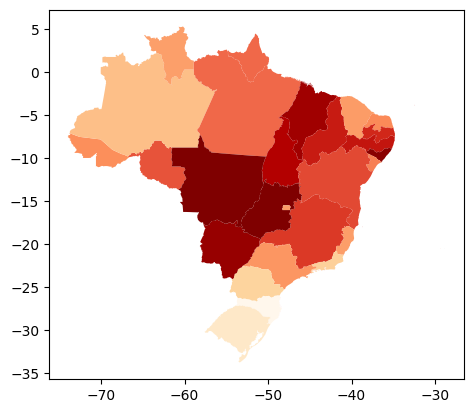

In [10]:
merged.plot(column="1000-2050-I", cmap="OrRd")

In [11]:
if os.path.exists(outputPath):
    shutil.rmtree(outputPath)
os.makedirs(outputPath+'images')
os.makedirs(outputPath+'shapefiles')

In [12]:
print(merged.columns[2:-4])

Index(['1000-2030-I', '1000-2050-I', '1000-2030-M', '1000-2050-M',
       '1000-2030-D', '1000-2050-D', '1001-2019', '1001-2030-I', '1001-2050-I',
       '1001-2030-M', '1001-2050-M', '1001-2030-D', '1001-2050-D', '1002-2020',
       '1002-2030-I', '1002-2050-I', '1002-2030-M', '1002-2050-M',
       '1002-2030-D', '1002-2050-D', '1003-2020', '1003-2030-I', '1003-2050-I',
       '1003-2030-M', '1003-2050-M', '1003-2030-D', '1003-2050-D', '1004-2020',
       '1004-2030-I', '1004-2050-I', '1004-2030-M', '1004-2050-M',
       '1004-2030-D', '1004-2050-D', '1005-2019', '1005-2030-I', '1005-2050-I',
       '1005-2030-M', '1005-2050-M', '1005-2030-D', '1005-2050-D', '1006-2020',
       '1006-2030-I', '1006-2050-I', '1006-2030-M', '1006-2050-M',
       '1006-2030-D', '1006-2050-D', '1007-2030-I', '1007-2050-I',
       '1008-2030-I', '1008-2050-I', '1009-2030-I', '1009-2050-I',
       '1010-2030-I', '1010-2050-I', '1011-2030-I', '1011-2050-I',
       '1012-2030-I', '1012-2050-I', '1013-2030-I',

In [13]:
for column in merged.columns[2:-4]:
    plot = merged.plot(column=column, cmap="OrRd", legend=True)
    plt.suptitle = column
    fig = plot.get_figure()
    fig.savefig(outputPath+'images\\'+column)
    pyplot.close()